In [11]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv('./data_files/spotify.csv')

df.head()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


# Central Tendency

I want to calculate the mean, median, and mode of the `in_spotify_playlists` column.

In [9]:
mean = df['in_spotify_playlists'].mean()
median = df['in_spotify_playlists'].median()

# can also use scipy.stats
#mode = stats.mode(df['in_spotify_charts'])

print('----- Central Tendency -----')
print(f'Mean:\t{mean}')
print(f'Median: {median}')
#print(f'Mode:\t{mode}')

----- Central Tendency -----
Mean:	5202.56512605042
Median: 2216.5
Mode:	ModeResult(mode=0, count=404)


## Boxplot Analysis 

I want to construct a boxplot for the `bpm` column.

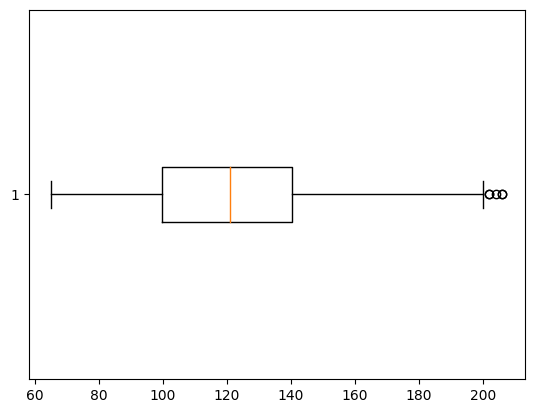

In [13]:
plt.boxplot(df['bpm'], vert=False)
plt.show()

## Five Number Summary

I want the five number summary of the `bpm` column.

- Min
- Lower quartile/Q1 (25%)
- Median/Q2 (50%)
- Upper quartile/Q3 (75%)
- Max

In [15]:
min = np.min(df.bpm)
q1 = np.percentile(df.bpm, 25)
med = np.median(df.bpm)
q3 = np.percentile(df.bpm, 75)
max = np.max(df.bpm)

# We can also calculate these values and store them in a list on one line
five_num_summary = np.percentile(df.bpm, [0,25,50,75,100])

print('----------- Five Number Summary -----------')
print(f'Min: {five_num_summary[0]}')
print(f'Q1: {five_num_summary[1]}')
print(f'Median: {five_num_summary[2]}')
print(f'Q3: {five_num_summary[3]}')
print(f'Max: {five_num_summary[4]}')

----------- Five Number Summary -----------
Min: 65.0
Q1: 99.75
Median: 121.0
Q3: 140.25
Max: 206.0


# How to Write FNS as a function

If I am doing an operation (e.g., five number summary) multiple times on multiple columns, it might be helpful to have a function do the heavy lifting of repititon. 

YOU HAVE TO DEFINE THE FUNCTION BEFORE YOU CAN CALL IT. 

In [45]:
# write the header
def five_number_summary(column):
    min = np.min(df[column])
    q1 = np.percentile(df[column], 25)
    med = np.median(df[column])
    q3 = np.percentile(df[column], 75)
    max = np.max(df[column])

    print(f'Min: {min:,.2F}')
    print(f'Q1: {q1:,.2F}')
    print(f'Median: {med:,.2F}')
    print(f'Q3: {q3:,.2F}')
    print(f'Max: {max:,.2F}')

# call the function
five_number_summary('streams')



Min: 2762
Q1: 141636175.0
Median: 290530915.0
Q3: 673869022.0
Max: 3703895074


# IQR, Outliers, Standard Deviation, and Variance

In [29]:
iqr = q3 - q1
upper_limit = (1.5 * iqr) + q3
lower_limit = q1 - (1.5 * iqr)

print(f'Inner Quartile Range:\t{iqr}')
print(f'Ummer Limit:\t\t{upper_limit}')
print(f'Lower Limit:\t\t{lower_limit}')

standard_dev = df.bpm.std()
variance = standard_dev * standard_dev

print(f'\nStandard Deviation:\t{standard_dev:.3F}')

# use string interpolation with an 'f string' (formatted string)
# https://peps.python.org/pep-0498/
print(f'Variance:\t\t{variance:.3F}')

Inner Quartile Range:	40.5
Ummer Limit:		201.0
Lower Limit:		39.0

Standard Deviation:	28.070
Variance:		787.902


# Histogram

I want to show a histogram for the `released_month` column.

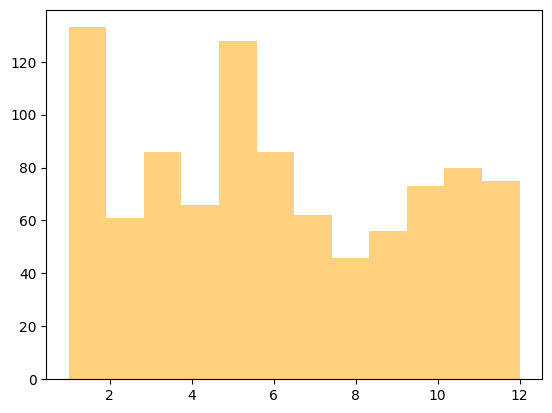

In [33]:
# I'm going to use pyplot
plt.hist(df.released_month, bins=12, color='orange', alpha=0.5)
plt.show()


# Scatter Plot

I want a scatter plot to compare `streams` and `in_spotify_playlists`.

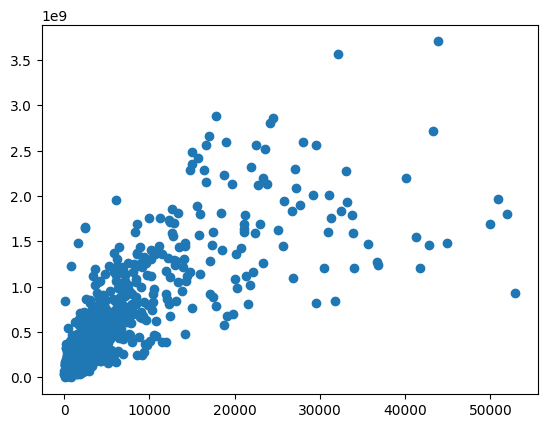

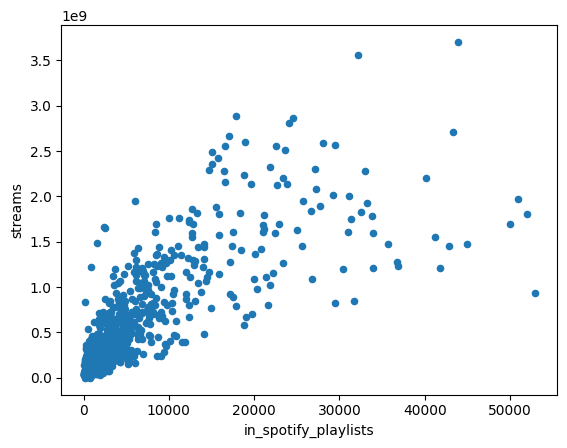

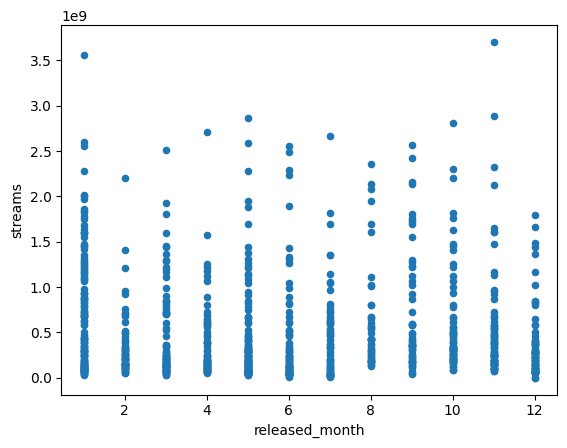

In [44]:
plt.scatter(x=df.in_spotify_playlists, y=df.streams)
# we can also use pandas
df.plot.scatter(x='in_spotify_playlists', y='streams')

plt.show()